Este notebook ilustra los cálculos de la clase 3

# 1. El Método de Bisección

Introducimos el método de bisección con algunos gráficos.

In [1]:
using Pkg
Pkg.add("Plots");

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [2]:
using Plots

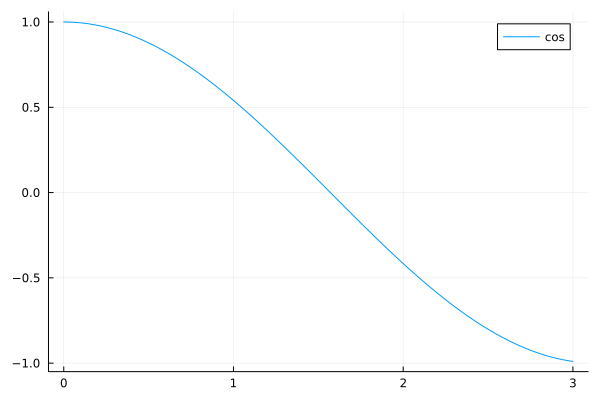

In [12]:
plot(cos, 0.0:0.01:3.0, label="cos")

Ahora agregamos detalles al gráfico, usando `plot!`. Buscamos una raíz en el intervalo.
 $[\pi/4, 2 \pi/3]$.

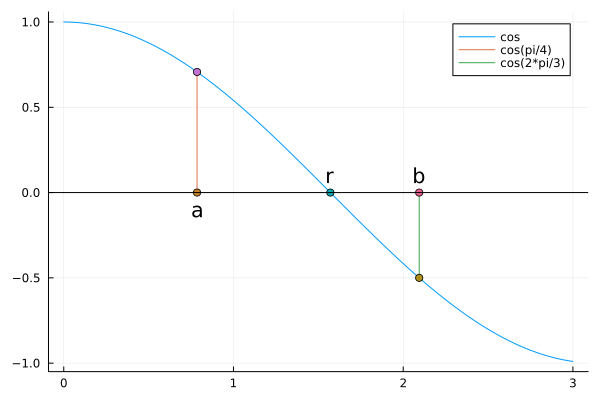

In [13]:
plot!([pi/4], [cos(pi/4)], line=(:sticks), label="cos(pi/4)")
plot!([2*pi/3], [cos(2*pi/3)], line=(:sticks), label="cos(2*pi/3)")
plot!([pi/4], [cos(pi/4)], line=(:scatter, :blue), label="")
plot!([2*pi/3], [cos(2*pi/3)], line=(:scatter, :blue), label="")
plot!([pi/2], [0], line=(:scatter, :blue), label="")
plot!([2*pi/3], [0], line=(:scatter, :green), label="")
plot!([pi/4], [0], line=(:scatter, :red), label="")
annotate!(pi/2, 0.1, text("r"))
annotate!(2*pi/3, 0.1, text("b"))
annotate!(pi/4, -0.1, text("a"))
hline!([0.0], label="", line=(:black))

Dado que $ \cos(\pi/4) \cos(2 \pi/3) < 0 $ y $ \cos() $ es una función continua bien comportada, sabemos que existe una raíz en el intervalo $ [\pi/4, 2 \pi/3] $. 

Para aproximar la raíz, dividimos repetidamente el intervalo $ [a, b] $ a la mitad, preservando el invariante $ f(a) f(b) < 0 $ en cada partición del intervalo.



In [14]:
using Printf # to format numbers

In [16]:
"""
Aplica el método de bisección a la función f en el intervalo [a, b],
asumiendo que f es continua y que f(a) * f(b) < 0.
El proceso se detiene cuando |f(a)| < ϵ o |f(b)| < ϵ o |b - a| < ϵ.
Devuelve los límites izquierdo y derecho del intervalo final que encierra la raíz, 
junto con un valor Booleano que indica si hubo fallo.
El fallo se reporta cuando la precisión requerida no se cumple en N iteraciones; 
en caso contrario, fail = 0 al retornar.

Ejemplo:

    (a, b, fail) = bisect(cos, pi/4, 2 * pi / 3, 1.0e-4, 100)
"""
function bisect(f::Function,
                a::Float64,b::Float64,eps::Float64,N::Int)
    println("running the bisection method...")
    println("-------------------------------------------")
    println("    a      b      m     |f(m)|     |b-a|   ")
    println("-------------------------------------------")
    for i = 1:N 
        m = (a+b)/2
        fm = f(m)
        if fm*f(a) < 0
            b = m
        else
            a = m
        end
        stra = @sprintf("%4.3f", a)
        strb = @sprintf("%4.3f", b)
        strm = @sprintf("%4.3f", m)
        strafm = @sprintf("%.2e", abs(fm))
        strabma = @sprintf("%.2e", abs(b-a))
        println("  $stra  $strb  $strm  $strafm  $strabma")
        if (abs(fm) < eps) | ((b-a) < eps)
            fail = false;
            stri = string(i)
            println("succeeded after $stri steps")
            return (a, b, fail)
        end
    end
    strN = string(N)
    println("failed requirements after $strN steps")
    fail = true
    return (a, b, fail)
end

bisect

Let us run the example.

In [17]:
(a,b,fail) = bisect( cos, pi/4, 2*pi/3, 1.0e-8, 1000)

running the bisection method...
-------------------------------------------
    a      b      m     |f(m)|     |b-a|   
-------------------------------------------
  1.440  2.094  1.440  1.31e-01  6.54e-01
  1.440  1.767  1.767  1.95e-01  3.27e-01
  1.440  1.604  1.604  3.27e-02  1.64e-01
  1.522  1.604  1.522  4.91e-02  8.18e-02
  1.563  1.604  1.563  8.18e-03  4.09e-02
  1.563  1.583  1.583  1.23e-02  2.05e-02
  1.563  1.573  1.573  2.05e-03  1.02e-02
  1.568  1.573  1.568  3.07e-03  5.11e-03
  1.570  1.573  1.570  5.11e-04  2.56e-03
  1.570  1.572  1.572  7.67e-04  1.28e-03
  1.570  1.571  1.571  1.28e-04  6.39e-04
  1.571  1.571  1.571  1.92e-04  3.20e-04
  1.571  1.571  1.571  3.20e-05  1.60e-04
  1.571  1.571  1.571  4.79e-05  7.99e-05
  1.571  1.571  1.571  7.99e-06  3.99e-05
  1.571  1.571  1.571  1.20e-05  2.00e-05
  1.571  1.571  1.571  2.00e-06  9.99e-06
  1.571  1.571  1.571  3.00e-06  4.99e-06
  1.571  1.571  1.571  4.99e-07  2.50e-06
  1.571  1.571  1.571  7.49e-07  1.25e

(1.5707963189926668, 1.5707963580038156, false)

In [14]:
abs(a - π/2)

7.802229751163736e-9

In [15]:
abs(b - π/2)

3.1208919004654945e-8

It is important to understand why 13 steps were needed, given the accuracy requirment of 4 decimal places, starting with the error bound of $|b - a|/2$.

# 2. Cobweb Diagrams

To illustrate fixed-point iterations, we make some plots.

In [7]:
using Plots

Consider the function below to make a cobweb diagram.

In [16]:
"""
Applies the fixed-point iteration to a given function g
and makes a cobweb plot.

ON ENTRY :
  g       a function in one variable
  x0      initial guess for the fixed-point iteration
  maxit   upper bound on the number of iterations
  tol     tolerance on the abs(g(x) - x) where x is
          the current approximation for the fixed point
  a       left bound for the range of the plot
  b       right bound for the range of the plot

ON RETURN :
  x       the current approximation for the fixed point
  numit   the number of iterations done
  fail    true if the accuracy requirement was not met,
          false otherwise;
  plt     a plot of the cobweb diagram.

EXAMPLE :
  g(x) = 1-x^3
  (x, numit, fail, plt) = cobweb(g,0.5,10,1.0e-4,-0.1,1.1)
"""
function cobweb(g::Function,x0::Float64,maxit::Int,tol::Float64,
                a::Float64,b::Float64)
    r = a:0.01:b
    plt = plot(g, r, label="g")
    ylims!((a, b))
    diagonal(x) = x
    plot!(diagonal, r, label="")
    println("running a fixed-point iteration ...")
    strit = @sprintf("%3d", 0)
    strx0 = @sprintf("%.4e", x0)
    println("$strit : $strx0")
    xprevious = x0
    xnext = xprevious
    for i=1:maxit
        xnext = g(xprevious)
        if i == 1
            plot!([xprevious], [xnext], line=(:sticks, :black), label="")
        else
            if xprevious < xnext
                rng = xprevious:0.01:xnext; xr = [xprevious for i in rng]
                plot!(xr, rng, line=(:black), label="")
            else
                rng = xnext:0.01:xprevious; xr = [xprevious for i in rng]
                plot!(xr, rng, line=(:black), label="")
            end
       end
       if xprevious < xnext
           rng = xprevious:0.01:xnext; yr = [xnext for i in rng]
           plot!(rng, yr, line=(:black), label="")
       else
           rng = xnext:0.01:xprevious; yr = [xnext for i in rng]
           plot!(rng, yr, line=(:black), label="")
       end
       strit = @sprintf("%3d", i)
       strxi = @sprintf("%.4e", xnext)
       error = abs(xnext - xprevious)
       strerr = @sprintf("%.2e", error)
       println("$strit : $strxi : $strerr" )
       if error < tol
           return (xnext, i, false, plt)
       end
       xprevious = xnext
   end
   return (xnext, maxit, true, plt)
end


cobweb

Let us do one step of the cobweb function ...

In [17]:
g1(x) = 1 - x^3
(endpt, numit, fail, cobweb1) = cobweb(g1, 0.5, 1, 1.0e-8, -0.1, 1.1);

running a fixed-point iteration ...
  0 : 5.0000e-01
  1 : 8.7500e-01 : 3.75e-01


and now look carefully at the plot

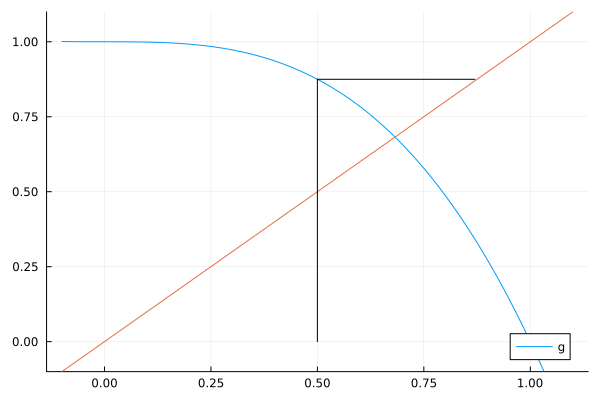

In [18]:
display(cobweb1)

What if we do two steps?

In [19]:
(endpt, numit, fail, cobweb2) = cobweb(g1, 0.5, 2, 1.0e-8, -0.1, 1.1);

running a fixed-point iteration ...
  0 : 5.0000e-01
  1 : 8.7500e-01 : 3.75e-01
  2 : 3.3008e-01 : 5.45e-01


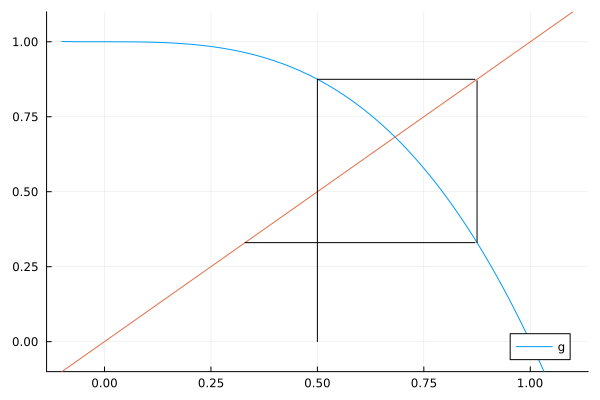

In [20]:
display(cobweb2)

Let us do 10 steps ...

In [21]:
(endpt, numit, fail, cobweb10) = cobweb(g1, 0.5, 10, 1.0e-8, -0.1, 1.1);

running a fixed-point iteration ...
  0 : 5.0000e-01
  1 : 8.7500e-01 : 3.75e-01
  2 : 3.3008e-01 : 5.45e-01
  3 : 9.6404e-01 : 6.34e-01
  4 : 1.0405e-01 : 8.60e-01
  5 : 9.9887e-01 : 8.95e-01
  6 : 3.3761e-03 : 9.95e-01
  7 : 1.0000e+00 : 9.97e-01
  8 : 1.1544e-07 : 1.00e+00
  9 : 1.0000e+00 : 1.00e+00
 10 : 0.0000e+00 : 1.00e+00


What was already noticeable in the second step should now be obvious...

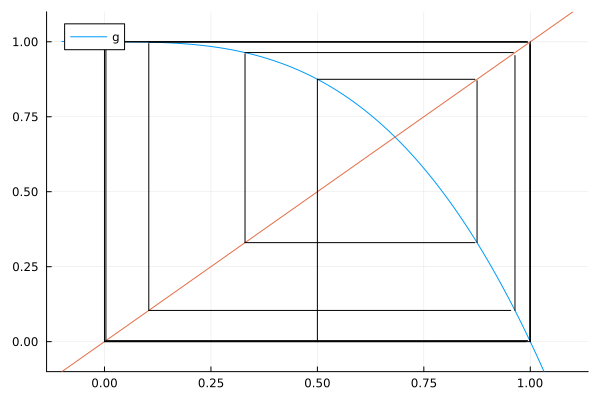

In [22]:
display(cobweb10)

The shape of the picture justifies the name cobweb diagram.
*Observe that we are NOT converging to the fixed point!*

In [23]:
g2(x) = (1 - x)^(1/3)
(endpt, numit, fail, cobwebg2) = cobweb(g2, 0.5, 10, 1.0e-8, 0.1, 0.9)

running a fixed-point iteration ...
  0 : 5.0000e-01
  1 : 7.9370e-01 : 2.94e-01
  2 : 5.9088e-01 : 2.03e-01
  3 : 7.4236e-01 : 1.51e-01
  4 : 6.3631e-01 : 1.06e-01
  5 : 7.1380e-01 : 7.75e-02
  6 : 6.5901e-01 : 5.48e-02
  7 : 6.9863e-01 : 3.96e-02
  8 : 6.7045e-01 : 2.82e-02
  9 : 6.9073e-01 : 2.03e-02
 10 : 6.7626e-01 : 1.45e-02


(0.6762589249268274, 10, true, Plot{Plots.GRBackend() n=22})

We observe that there is convergence, although the convergence is *really slow!*  It makes for a good plot though.

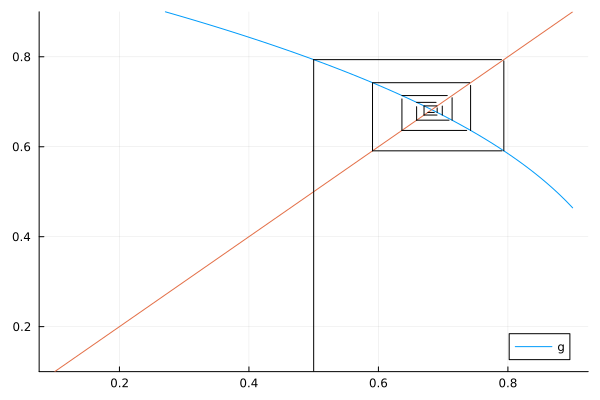

In [24]:
display(cobwebg2)

In [25]:
g3(x) = (1 + 2*x^3)/(1 + 3*x^2)
(endpt, numit, fail, cobwebg3) = cobweb(g3, 0.5, 10, 1.0e-8, -0.1, 1.1)

running a fixed-point iteration ...
  0 : 5.0000e-01
  1 : 7.1429e-01 : 2.14e-01
  2 : 6.8318e-01 : 3.11e-02
  3 : 6.8233e-01 : 8.51e-04
  4 : 6.8233e-01 : 6.19e-07
  5 : 6.8233e-01 : 3.28e-13


(0.6823278038280193, 5, false, Plot{Plots.GRBackend() n=12})

Although we allowed 10 steps, the iterations stopped after five steps, reporting an error of ``3.28e-13``, which is really tiny.  The plot reflects this very fast convergence.

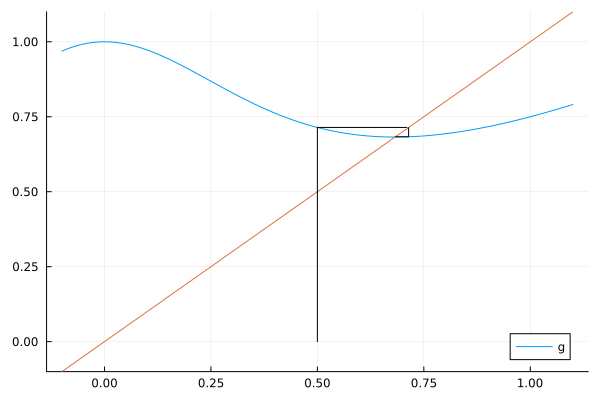

In [26]:
display(cobwebg3)

To understand the convergence (or divergence), we consider the derivative of the fixed-point function at the fixed point.